In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm,tqdm_notebook
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import math
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
from tqdm import tqdm,tqdm_notebook
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Libs..
import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# DL Libs..

CWD is  /home/ec2-user/IS434/New Run1


In [3]:
df_train = pd.read_csv('train.tsv', '\t')
df_train = df_train.sample(n = 500_000)
df_train_split ,df_test_split = train_test_split(df_train,test_size = 0.25)

In [4]:
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
944329,944329,Betsey Johnson Knock double chain,1,Women/Jewelry/Necklaces,Betsey Johnson,8.0,1,"New, never worn and very stylish for any makeu..."
1388415,1388415,Philadelphia Phillies shirt,2,Sports & Outdoors/Fan Shop/MLB,Nike,9.0,0,Vintage Phillies logo; Blue shirt with red det...
1002837,1002837,Miami Hurricanes Baseball Bundle,2,Men/Athletic Apparel/Jerseys,NaN,23.0,0,Miami Hurricanes Baseball Jersey - Sz Large - ...
117655,117655,VS PINK L Campus Shorts new,1,Women/Athletic Apparel/Shorts,PINK,30.0,1,Victoria's Secret PINK Size large New with tag...
522351,522351,Nightmare Before Christmas Bag,3,Women/Women's Handbags/Shoulder Bag,Hot Topic,16.0,1,"Hot Topic Nightmare Before Christmas purse, ci..."


# Missing Data

After conducting an EDA on our dataset, we observed that name and category_name has missing data.  
We will feel the missing data with "Missing"

In [5]:
def fill_missing_data(data):
    data.brand_name.fillna(value = "Missing", inplace = True)
    data.category_name.fillna(value = "Missing", inplace = True)

fill_missing_data(df_train_split)
fill_missing_data(df_test_split)

# Remove outliers in Price Column

In [6]:
df_train_split[df_train_split["price"] < 3].count()

train_id             205
name                 205
item_condition_id    205
category_name        205
brand_name           205
price                205
shipping             205
item_description     205
dtype: int64

In [7]:
df_train_split[df_train_split["price"] > 2000].count()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [8]:
df_train_split = df_train_split[(df_train_split.price >= 3)]
df_test_split = df_test_split[(df_test_split.price >= 3)]

Log(Price)

In [9]:
df_train_split['log_price'] = np.log1p(df_train_split['price'])
df_test_split['log_price'] = np.log1p(df_test_split['price'])

# Tokenize

## Category_name column

In [10]:
cat_unique = pd.Series("/".join(df_train_split["category_name"].unique().astype("str")).split("/")).unique()

In [11]:
print(len(cat_unique))

878


In [12]:
CV_category = CountVectorizer(vocabulary = cat_unique ,lowercase = False, binary = True)

In [13]:
CV_category.fit(df_train_split["category_name"])
df_train_transform = CV_category.transform(df_train_split["category_name"])
df_test_transform = CV_category.transform(df_test_split['category_name'])

#creates a matrix in which each unique word is represented by a column of the matrix,
#and each text sample from the document is a row in the matrix. 
#The value of each cell is nothing but the count of the word in that particular text sample. 
print(df_train_transform.shape, df_test_transform.shape)

(374795, 878) (124938, 878)


In [14]:
CV_category.get_feature_names()

['Women',
 'Tops & Blouses',
 'Tank, Cami',
 'T-Shirts',
 'Electronics',
 'Cell Phones & Accessories',
 'Cases, Covers & Skins',
 'Underwear',
 'Bras',
 'Panties',
 'Cell Phone Accessories',
 'Skirts',
 'Mini',
 'Beauty',
 'Makeup',
 'Lips',
 'Athletic Apparel',
 'Pants, Tights, Leggings',
 "Women's Handbags",
 'Totes & Shoppers',
 'Men',
 'Jeans',
 'Classic, Straight Leg',
 'Shoes',
 'Sandals',
 'Handmade',
 'Accessories',
 'Lanyard',
 "Men's Accessories",
 'Hats',
 'Kids',
 'Boys 2T-5T',
 'Jewelry',
 'Necklaces',
 'Toys',
 'Action Figures & Statues',
 'Bracelets',
 'Makeup Sets',
 'Home',
 'Bedding',
 'Blankets & Throws',
 'Video Games & Consoles',
 'Games',
 'Hobbies',
 'Skin Care',
 'Body',
 'Dresses',
 'Asymmetrical Hem',
 'Sports & Outdoors',
 'Exercise',
 'Fitness accessories',
 'Vintage & Collectibles',
 'Toy',
 'Action Figure',
 'Consoles',
 'Missing',
 'Above Knee, Mini',
 'Tops',
 'T-shirts',
 'Other',
 'Automotive',
 'Interior Accessories',
 'Girls 0-24 Mos',
 'Tools & Acce

In [15]:
df_train_transform.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [16]:
CV_category.vocabulary_

{'Women': 0,
 'Tops & Blouses': 1,
 'Tank, Cami': 2,
 'T-Shirts': 3,
 'Electronics': 4,
 'Cell Phones & Accessories': 5,
 'Cases, Covers & Skins': 6,
 'Underwear': 7,
 'Bras': 8,
 'Panties': 9,
 'Cell Phone Accessories': 10,
 'Skirts': 11,
 'Mini': 12,
 'Beauty': 13,
 'Makeup': 14,
 'Lips': 15,
 'Athletic Apparel': 16,
 'Pants, Tights, Leggings': 17,
 "Women's Handbags": 18,
 'Totes & Shoppers': 19,
 'Men': 20,
 'Jeans': 21,
 'Classic, Straight Leg': 22,
 'Shoes': 23,
 'Sandals': 24,
 'Handmade': 25,
 'Accessories': 26,
 'Lanyard': 27,
 "Men's Accessories": 28,
 'Hats': 29,
 'Kids': 30,
 'Boys 2T-5T': 31,
 'Jewelry': 32,
 'Necklaces': 33,
 'Toys': 34,
 'Action Figures & Statues': 35,
 'Bracelets': 36,
 'Makeup Sets': 37,
 'Home': 38,
 'Bedding': 39,
 'Blankets & Throws': 40,
 'Video Games & Consoles': 41,
 'Games': 42,
 'Hobbies': 43,
 'Skin Care': 44,
 'Body': 45,
 'Dresses': 46,
 'Asymmetrical Hem': 47,
 'Sports & Outdoors': 48,
 'Exercise': 49,
 'Fitness accessories': 50,
 'Vintage 

Truncated SVD for feature importance

What is SVD?
SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

It helps with dimensionality reduction.



In [17]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=1)
svd.fit(df_train_transform)

TruncatedSVD(n_components=100, n_iter=1)

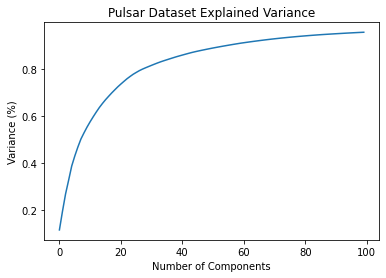

In [18]:
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

with K = 80, we get an explained variance above 90%(?).Hence, 80 features or words explain 90% of our data.

We can just use these top components as our features.

## Name column

In [19]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['name'].values) 


# train_name = vectorizer.transform(df_train_split['name'].values)
# test_name = vectorizer.transform(df_test_split['name'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [20]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
stop_words = stopwords.words('english')

def preprocess(sentence):
    sentence=str(sentence)
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)

df_train_split['name_process']=df_train_split['name'].map(lambda s:preprocess(s))
df_test_split['name_process']=df_test_split['name'].map(lambda s:preprocess(s))


In [21]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train_split['name_process'].values) 


train_name = vectorizer.transform(df_train_split['name_process'].values)
test_name = vectorizer.transform(df_test_split['name_process'].values)

print("After vectorizations")
print(train_name.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(374795, 7033)
['aaron', 'ab', 'abalon', 'abbey', 'abbi', 'abc', 'abercrombi', 'abh', 'about', 'abov', 'absolu', 'absolut', 'abstract', 'acacia', 'academi', 'acc', 'acceler', 'accent', 'access', 'accessori', 'accu', 'ace', 'acer', 'acg', 'acid', 'acn', 'acoust', 'acqua', 'acryl', 'act', 'action', 'activ', 'activewear', 'actual', 'acuvu', 'adam', 'adapt', 'adaptor', 'add', 'addi', 'addict', 'addida', 'addit', 'address', 'adel', 'adelin', 'aden', 'adhes', 'adida', 'adjust', 'ador', 'adrianna', 'adrienn', 'adult', 'advanc', 'advantag', 'advent', 'adventur', 'advisori', 'advocar', 'aeo', 'aeri', 'aero', 'aeropostal', 'aeropostl', 'aerosol', 'aesthet', 'afflict', 'african', 'after', 'afterglow', 'agaci', 'against', 'agat', 'agd', 'age', 'ageless', 'agenda', 'agent', 'agil', 'agn', 'ahhhsugarsugar', 'aid', 'aiko', 'aio', 'air', 'airbrush', 'airforc', 'airmax', 'airplan', 'airsoft', 'airspun', 'airwalk', 'airwick', 'akira', 'alabama', 'aladdin', 'alarm', 'albert', 'album'

# Item Description

In [22]:
# function to decontract phrases
#https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def text_process(text):
    stop_words = stopwords.words('english')
    processed = []
    desc_length_tokenized = []
    for sentence in tqdm_notebook(text):
        sentence_decontracted = decontracted(sentence)
        sentence_decontracted = sentence_decontracted.replace('\\"', ' ')
        sentence_decontracted = sentence_decontracted.replace('\\`', ' ')
        sentence_decontracted = re.sub(r"[^0-9a-zA-Z]+", ' ', sentence_decontracted)
        text_tokens = word_tokenize(sentence_decontracted)
        desc_length_tokenized.append(len(text_tokens))
        joined_words = " ".join(word for word in text_tokens if word not in stop_words)
        processed.append(joined_words)
    return processed, desc_length_tokenized

In [23]:
df_train_split['item_description'] = df_train_split['item_description'].replace([np.nan],"No Description")
df_test_split['item_description'] = df_test_split['item_description'].replace([np.nan],"No Description")

In [24]:
df_train_split['item_desc_processed'], df_train_split['item_desc_length_tokenized'] = text_process(df_train_split['item_description'])
df_test_split['item_desc_processed'], df_test_split['item_desc_length_tokenized'] = text_process(df_test_split['item_description'])

In [25]:
df_train_split['item_desc_processed_2']=df_train_split['item_description'].map(lambda s:preprocess(s))
df_test_split['item_desc_processed_2']=df_test_split['item_description'].map(lambda s:preprocess(s))

In [26]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['item_desc_processed_2'].values) 


# train_name = vectorizer.transform(df_train_split['item_desc_processed_2'].values)
# test_name = vectorizer.transform(df_test_split['item_desc_processed_2'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [27]:
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_df = 0.5, max_features=5000, use_idf=True) 
tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed_2'])
tfidf_vectorizer_vectors_test = tfidf_vectorizer.transform(df_test_split['item_desc_processed_2'])


In [28]:
print(tfidf_vectorizer_vectors_train.shape)
print(tfidf_vectorizer_vectors_test.shape)

(374795, 5000)
(124938, 5000)


In [29]:
print(tfidf_vectorizer.get_feature_names())

['abercrombi', 'abercrombi fitch', 'abh', 'abil', 'abl', 'about', 'absolut', 'absorb', 'accent', 'accept', 'accept offer', 'access', 'accessori', 'accident', 'accord', 'account', 'accur', 'achiev', 'acid', 'acn', 'across', 'acryl', 'action', 'activ', 'activ charcoal', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addit item', 'address', 'adhes', 'adida', 'adjust', 'adjust shoulder', 'adjust shoulder strap', 'adjust strap', 'ador', 'adult', 'advanc', 'advantag', 'adventur', 'aeropostal', 'affect', 'afford', 'african', 'after', 'age', 'ago', 'agre', 'air', 'air ipad', 'air jordan', 'air max', 'alarm', 'album', 'alcohol', 'alex', 'alex ani', 'all', 'all black', 'all brand', 'all brand new', 'all good', 'all good condit', 'all great', 'all item', 'all item come', 'all item ship', 'all new', 'all order', 'all price', 'all product', 'all sale', 'all sale final', 'all size', 'allow', 'alloy', 'almond', 'almost', 'almost new', 'alo', 'aloha', 'alon', 'along', 'alreadi', 'also', 'also ava

## Sentiment of item description

In [30]:
def generate_sentiment_scores(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in tqdm_notebook(sentences): 
        sentence_sentiment_score = analyzer.polarity_scores(sentence)
        results.append(sentence_sentiment_score)
    return results

In [31]:
train_senti_desc = generate_sentiment_scores(df_train_split['item_description'])
test_senti_desc = generate_sentiment_scores(df_test_split['item_description'])

In [32]:
def get_sentiments(dataframe, array):
    negative, neutral, compound, positive = [], [], [], []
    for sentiment_dict in array:
        for sentiment, score in sentiment_dict.items():
            if(sentiment=='neg'):
                negative.append(score)
            elif(sentiment=='neu'):
                neutral.append(score)
            elif(sentiment=='compound'):
                compound.append(score)
            elif(sentiment=='pos'):
                positive.append(score)
    dataframe['negative'] = negative
    dataframe['positive'] = positive
    dataframe['neutral'] = neutral
    dataframe['compound'] = compound

In [33]:
get_sentiments(df_train_split,train_senti_desc)
get_sentiments(df_test_split,test_senti_desc)

In [34]:
def get_description_features(dataframe, sentence_df):
    percentage_of_exclamation_marks, percentage_of_star, percentage_of_ampersand, percentage_of_hashtag = [], [], [], []
    for description in sentence_df:
        hashtag_regex = re.compile(r'(#[a-z]{2,})')
        percentage_of_exclamation_marks.append(description.count('!')/len(description) * 100)
        percentage_of_star.append(description.count("*")/len(description)*100)
        percentage_of_ampersand.append(description.count("%")/len(description)*100)
        percentage_of_hashtag.append(len(hashtag_regex.findall(description))/len(description)*100)
    dataframe['percentage_of_exclamation_marks'] = percentage_of_exclamation_marks
    dataframe['percentage_of_star'] = percentage_of_star
    dataframe['percentage_of_ampersand'] = percentage_of_ampersand
    dataframe['percentage_of_hashtag'] = percentage_of_hashtag

In [35]:
get_description_features(df_train_split,df_train_split['item_description'])
get_description_features(df_test_split,df_test_split['item_description'])

Vectorize item description

In [36]:
# tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_features=5000, use_idf=True) 
# tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed'])
# tfidf_vectorizer_vectors_test =tfidf_vectorizer.transform(df_test_split['item_desc_processed'])

In [37]:
new = pd.DataFrame.sparse.from_spmatrix(data = tfidf_vectorizer_vectors_train, columns= tfidf_vectorizer.get_feature_names())

In [38]:
new

,abercrombi,abercrombi fitch,abh,abil,abl,about,absolut,absorb,accent,accept,...,zip closur,zip hoodi,zip pocket,zipper,zipper back,zipper closur,zipper pocket,zipper work,zirconia,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cat Brand Shipping

In [39]:
def generate_cbs_stats(train_data, test_data_to_transform):
    df_group_cat_brand_shipping = train_data.groupby('cat_brand_ship',as_index = False).agg({"shipping" : len,
                                                        "log_price" : [np.median, np.mean, np.std,np.min,np.max]})
    df_group_cat_brand_shipping.columns = ['cat_brand_ship','cat_brand_shipping_count','cat_brand_shipping_log_price_median','cat_brand_shipping_log_price_mean','cat_brand_shipping_log_price_std',
                    'cat_brand_shipping_log_price_min','cat_brand_shipping_log_price_max']

    df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'].fillna(0)
    df_group_cat_brand_shipping['cat_brand_shipping_log_price_conf_variance'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] / df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean']
    df_group_cat_brand_shipping['cat_brand_shipping_log_count'] = np.log1p(df_group_cat_brand_shipping['cat_brand_shipping_count'])
    df_group_cat_brand_shipping['cat_brand_shipping_min_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] - (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2)).clip(lower=1.0)
    df_group_cat_brand_shipping['cat_brand_shipping_max_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] + (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2))
    
    df_group_stats_train = train_data.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    df_group_stats_test = test_data_to_transform.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    scaler = StandardScaler(copy=True)
    cat_brand_shipping_feats_scaled_train = scaler.fit_transform(df_group_stats_train)
    cat_brand_shipping_fit = scaler.fit(df_group_stats_train)
    #fit with training, then transform test data using train data mean and SD
    cat_brand_shipping_feats_scaled_test = scaler.transform(df_group_stats_test)

    return cat_brand_shipping_feats_scaled_train, cat_brand_shipping_feats_scaled_test

In [40]:
df_train_split['cat_brand_ship'] = (df_train_split['category_name'].astype(str) + "_" + 
                                    df_train_split['brand_name'].astype(str) + "_" +  
                                    df_train_split['shipping'].astype(str))

df_test_split['cat_brand_ship'] = (df_test_split['category_name'].astype(str) + "_" + 
                                    df_test_split['brand_name'].astype(str) + "_" +  
                                    df_test_split['shipping'].astype(str))

In [41]:
train_cbs_feats, test_cbs_feats = generate_cbs_stats(df_train_split,df_test_split)

In [42]:
train_cbs_feats.shape
test_cbs_feats.shape

(124938, 7)

In [43]:
stats_train = pd.DataFrame(train_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

stats_test = pd.DataFrame(test_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

#  Item condition + Shipping Dummies

In [44]:
#itemcondition and shipping, create dummy variables
item_shipping_dummies_train = scipy.sparse.csr_matrix(pd.get_dummies(df_train_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)
item_shipping_dummies_test = scipy.sparse.csr_matrix(pd.get_dummies(df_test_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)

# Brand Name

In [45]:
df_train_split['brand_name'] = df_train_split['brand_name'].replace([np.nan],"No Brand Name")
df_test_split['brand_name'] = df_test_split['brand_name'].replace([np.nan],"No Brand Name")

In [46]:
#Label Binarizer 
# It assigns a unique value or number to each label in a categorical feature.
# It encodes categorical integer features as a one-hot numeric array. 
#It makes model training easier and faster.
#it encodes the data into dummy variables 
#indicating the presence of a particular label or not
lb = LabelBinarizer(sparse_output=True)
fitting_brand_name = lb.fit(df_train_split['brand_name'])
X_brand_train = lb.transform(df_train_split['brand_name'])
X_brand_test = lb.transform(df_test_split['brand_name'])

In [47]:
X_brand_test.shape

(124938, 3216)

In [48]:
print(df_train_split['brand_name'][:10])

532175     Victoria's Secret
546609                  PINK
689180               Missing
694601     Victoria's Secret
110397                  PINK
693195               Missing
621552             Lululemon
1359924            SeneGence
328826           Beyond Yoga
547739          Michael Kors
Name: brand_name, dtype: object


In [49]:
print(X_brand_train[:10])

  (0, 3016)	1
  (1, 2165)	1
  (2, 1937)	1
  (3, 3016)	1
  (4, 2165)	1
  (5, 1937)	1
  (6, 1773)	1
  (7, 2575)	1
  (8, 386)	1
  (9, 1908)	1


In [50]:
df_corr = pd.concat([pd.DataFrame(df_train_split,
                                  columns = ['item_desc_length_tokenized','negative', 'neutral', 'compound', 'positive','percentage_of_exclamation_marks', 'percentage_of_star', 'percentage_of_ampersand', 'percentage_of_hashtag']),
                    pd.DataFrame(train_cbs_feats,
                                  columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max']),
                    df_train_split['log_price'].reset_index(drop = True)],axis = 1)

In [51]:
#df_corr = pd.concat([df_train_split['log_price'].reset_index(drop = True)],axis = 1)

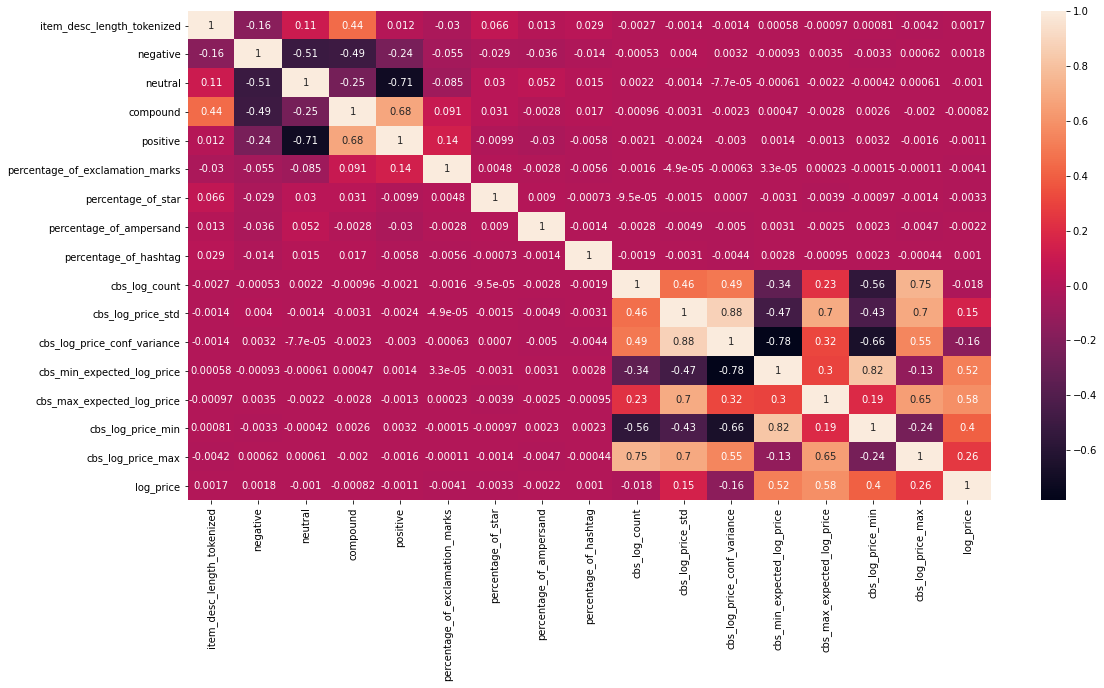

In [52]:
corrMatrix  = df_corr.corr()

plt.figure(figsize = (18,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Percentage of hashtag, Percentage of ampersand, Percentage of star, Percentage of exclamation marks
has a low correlation with log price and thus we are dropping.



# X_train and X_test

In [53]:
X_train = scipy.sparse.hstack((X_brand_train,
                               df_train_transform,
                               tfidf_vectorizer_vectors_train,
                               item_shipping_dummies_train,
                               train_name,
                               np.array(df_train_split['negative'])[:,None],
                               np.array(df_train_split['neutral'])[:,None],
                               np.array(df_train_split['compound'])[:,None],
                               np.array(df_train_split['positive'])[:,None]
                              )).tocsr().astype('float32')

X_test = scipy.sparse.hstack((X_brand_test,
                              df_test_transform,
                              tfidf_vectorizer_vectors_test,
                              item_shipping_dummies_test,
                              test_name,
                              np.array(df_test_split['negative'])[:,None],
                              np.array(df_test_split['neutral'])[:,None],
                              np.array(df_test_split['compound'])[:,None],
                              np.array(df_test_split['positive'])[:,None]
                              )).tocsr().astype('float32')

y_train = df_train_split['log_price']
y_test = df_test_split['log_price']

print("X_train Shape is ",X_train.shape)
print("X_test Shape is ",X_test.shape)
print("y_train Shape is ",y_train.shape)
print("y_test Shape is ",y_test.shape)

X_train Shape is  (374795, 16133)
X_test Shape is  (124938, 16133)
y_train Shape is  (374795,)
y_test Shape is  (124938,)


In [54]:
print(train_cbs_feats.shape, test_cbs_feats.shape)
print(X_brand_train.shape, X_brand_test.shape)
print(df_train_transform.shape, df_test_transform.shape)
print(tfidf_vectorizer_vectors_train.shape, tfidf_vectorizer_vectors_test.shape)
print(train_name.shape, test_name.shape)

(374795, 7) (124938, 7)
(374795, 3216) (124938, 3216)
(374795, 878) (124938, 878)
(374795, 5000) (124938, 5000)
(374795, 7033) (124938, 7033)


In [6]:
from scipy import sparse
import pandas as pd
# Uncomment out to save for the first time. Subsequent times only need to load
# sparse.save_npz("X_train.npz", X_train)
# sparse.save_npz("X_test.npz", X_test)
# y_train.to_pickle("y_train")
# y_test.to_pickle("y_test")


#Keep uncommented to load. 
X_train = sparse.load_npz("X_train.npz")
X_test = sparse.load_npz("X_test.npz")

y_train = pd.read_pickle("y_train")
y_test = pd.read_pickle("y_test")

# LightGBM with Tuning

In [7]:
from lightgbm import LGBMRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [57]:
#below are using the default/typical values 
lgbm_params ={
            'learning_rate': 0.1,
            'n_estimators': 100,
            'num_leaves': 31,
            'max_depth' : 7,
            'boosting_type' : ['gbdt'],
            'min_child_samples': 20, 
            'objective': 'regression'
}

In [58]:
lgbm_model = LGBMRegressor(**lgbm_params)
lgbm_model.fit(X_train, y_train, early_stopping_rounds=None,verbose=True)

lgbm_pred_train = lgbm_model.predict(X_train)
lgbm_pred_test  = lgbm_model.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test))

Train Mean Absolute Error: 0.4354600088290932
Train Mean Squared Error: 0.3195404329451423
Train Root Mean Squared Error: 0.5652790752762235
Train R^2: 0.42715241949706506
------------------------------
Test Mean Absolute Error: 0.43781335975499547
Test Mean Squared Error: 0.3232184336105196
Test Root Mean Squared Error: 0.5685230282147942
Test R^2: 0.4183897736349531


In [8]:
adjParams = {
    'learning_rate': [ 0.1,0.2,0.3],
    'n_estimators': [200,300,400],
    'num_leaves': [60,80,100,120,140],
    'max_depth' : [40,60,80,100],
    'boosting_type' : ['gbdt']  
            }

lgbm_params ={
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'min_child_samples': 20, 
    'objective': 'regression'
             }


In [9]:
lgbm_model = LGBMRegressor(**lgbm_params)
# Create the grid
grid = GridSearchCV(lgbm_model, adjParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train,
         early_stopping_rounds=None,
         verbose=True)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 76.3min finished


GridSearchCV(cv=3,
             estimator=LGBMRegressor(colsample_bytree=0.8,
                                     objective='regression', subsample=0.9),
             n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [20, 40, 60, 80],
                         'n_estimators': [200, 300, 400],
                         'num_leaves': [60, 80, 100, 120, 140]},
             verbose=1)

In [10]:
print('Best parameters found for LightGBM by grid search are:', grid.best_params_)

Best parameters found for LightGBM by grid search are: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 80, 'n_estimators': 400, 'num_leaves': 140}


In [11]:
lgbm_tuned_params ={
    'learning_rate': 0.1,
    'n_estimators': 400,
    'num_leaves': 140,
    'max_depth' : 80,
    'boosting_type' : 'gbdt',
    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    'min_child_samples': 20, 
    'objective': 'regression'
             }

lgbm_tune_model = LGBMRegressor(**lgbm_tuned_params)
lgbm_tune_model.fit(X_train, y_train,early_stopping_rounds=None,verbose=True)

LGBMRegressor(colsample_bytree=0.8, max_depth=80, n_estimators=400,
              num_leaves=140, objective='regression', subsample=0.9)

In [12]:
lgbm_pred_train_tuned = lgbm_tune_model.predict(X_train)
lgbm_pred_test_tuned  = lgbm_tune_model.predict(X_test)

In [13]:
print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lgbm_pred_train_tuned))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lgbm_pred_train_tuned))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lgbm_pred_train_tuned)))
print('Train R^2:',r2_score(y_train, lgbm_pred_train_tuned))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lgbm_pred_test_tuned))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lgbm_pred_test_tuned))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lgbm_pred_test_tuned)))
print('Test R^2:',r2_score(y_test, lgbm_pred_test_tuned))

Train Mean Absolute Error: 0.32015343663302004
Train Mean Squared Error: 0.17789029742275758
Train Root Mean Squared Error: 0.42177043213430404
Train R^2: 0.6810919183705659
------------------------------
Test Mean Absolute Error: 0.3566617068987901
Test Mean Squared Error: 0.22408225333050974
Test Root Mean Squared Error: 0.47337327061264217
Test R^2: 0.5967787832268431
